In [16]:
import pandas as pd

In [24]:
# (1) Используя параметры pandas прочитать красиво пандас (подвох что заголовки - первые 2 линии)
df = pd.read_csv('default_of_credit_card_clients.csv', skiprows=1, sep=';') 
#TODO


In [40]:
df.iloc[:5,1:] #дублирующие ID 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [67]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()
df['MARRIAGE'].std()*100 #процент в браке


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

52.19696006131538

In [80]:
df['PAY_2'].mean() #второй платеж

-0.13376666666666667

In [91]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)].shape[0]
#TODO

8656

In [135]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
df.loc[:,'PAY_0':'default payment next month'].groupby('default payment next month').median()

#TODO

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [137]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
df.pivot_table('SEX', 'EDUCATION', 'MARRIAGE', 'count')
#TODO

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,4.0,10.0,NaN
1,4.0,3722.0,6809.0,50.0
2,6.0,6842.0,7020.0,162.0
3,44.0,2861.0,1909.0,103.0
4,NaN,52.0,68.0,3.0
5,NaN,150.0,127.0,3.0
6,NaN,28.0,21.0,2.0


In [139]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000
df['TYPE_LIMIT_BAL'] = df['LIMIT_BAL'].map(
    lambda x:
        "A" if x <= 10000 else 
        "B" if x <= 100000 and x > 10000 else
        "C" if x <= 200000 and x > 100000 else
        "D" if x <= 400000 and x > 200000 else
        "E" if x <= 700000 and x > 400000 else
        "F" 
)
pd.crosstab( df['LIMIT_BAL'], df['TYPE_LIMIT_BAL'])
#print(df.TYPE_LIMIT_BAL) №запись к группе

#TODO

0        B
1        C
2        B
3        B
4        B
5        B
6        E
7        B
8        C
9        B
10       C
11       D
12       E
13       B
14       D
15       B
16       B
17       D
18       D
19       C
20       C
21       C
22       B
23       E
24       B
25       B
26       B
27       B
28       B
29       B
        ..
29970    D
29971    B
29972    C
29973    D
29974    B
29975    D
29976    B
29977    E
29978    D
29979    C
29980    B
29981    B
29982    B
29983    B
29984    B
29985    D
29986    D
29987    C
29988    D
29989    C
29990    C
29991    D
29992    A
29993    B
29994    B
29995    D
29996    C
29997    B
29998    B
29999    B
Name: TYPE_LIMIT_BAL, Length: 30000, dtype: object


In [145]:
# (7) построить распределение LIMIT_BAL (гистрограмму)

%matplotlib inline

import pandas as pd
#from matplotlib import pyplot as plot
#import seaborn as sns

(array([  1.24980000e+04,   7.88000000e+03,   5.05900000e+03,
          2.75900000e+03,   1.59800000e+03,   1.27000000e+02,
          5.60000000e+01,   2.20000000e+01,   0.00000000e+00,
          1.00000000e+00]),
 array([   10000.,   109000.,   208000.,   307000.,   406000.,   505000.,
          604000.,   703000.,   802000.,   901000.,  1000000.]),
 <a list of 10 Patch objects>)

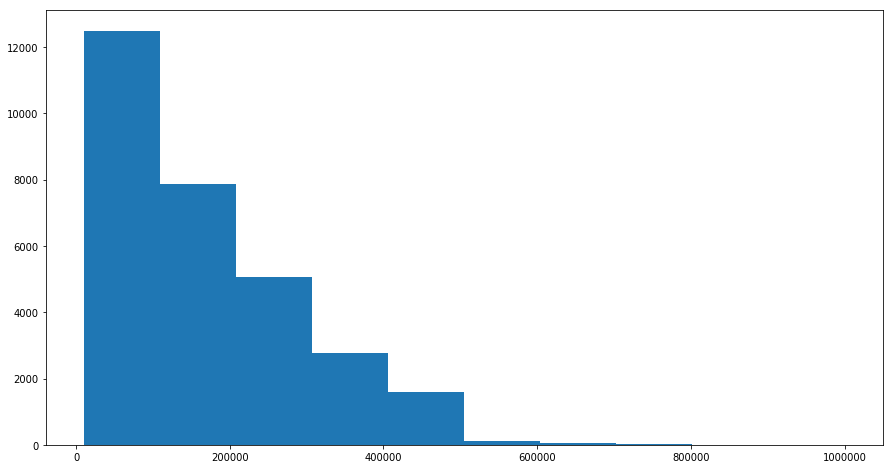

In [150]:
fig, ax = plot.subplots(figsize=(15,8))

plot.hist(list(df['LIMIT_BAL']))
#plot.hist(list(df['TYPE_LIMIT_BAL'])) -распределение по типам
#TODO

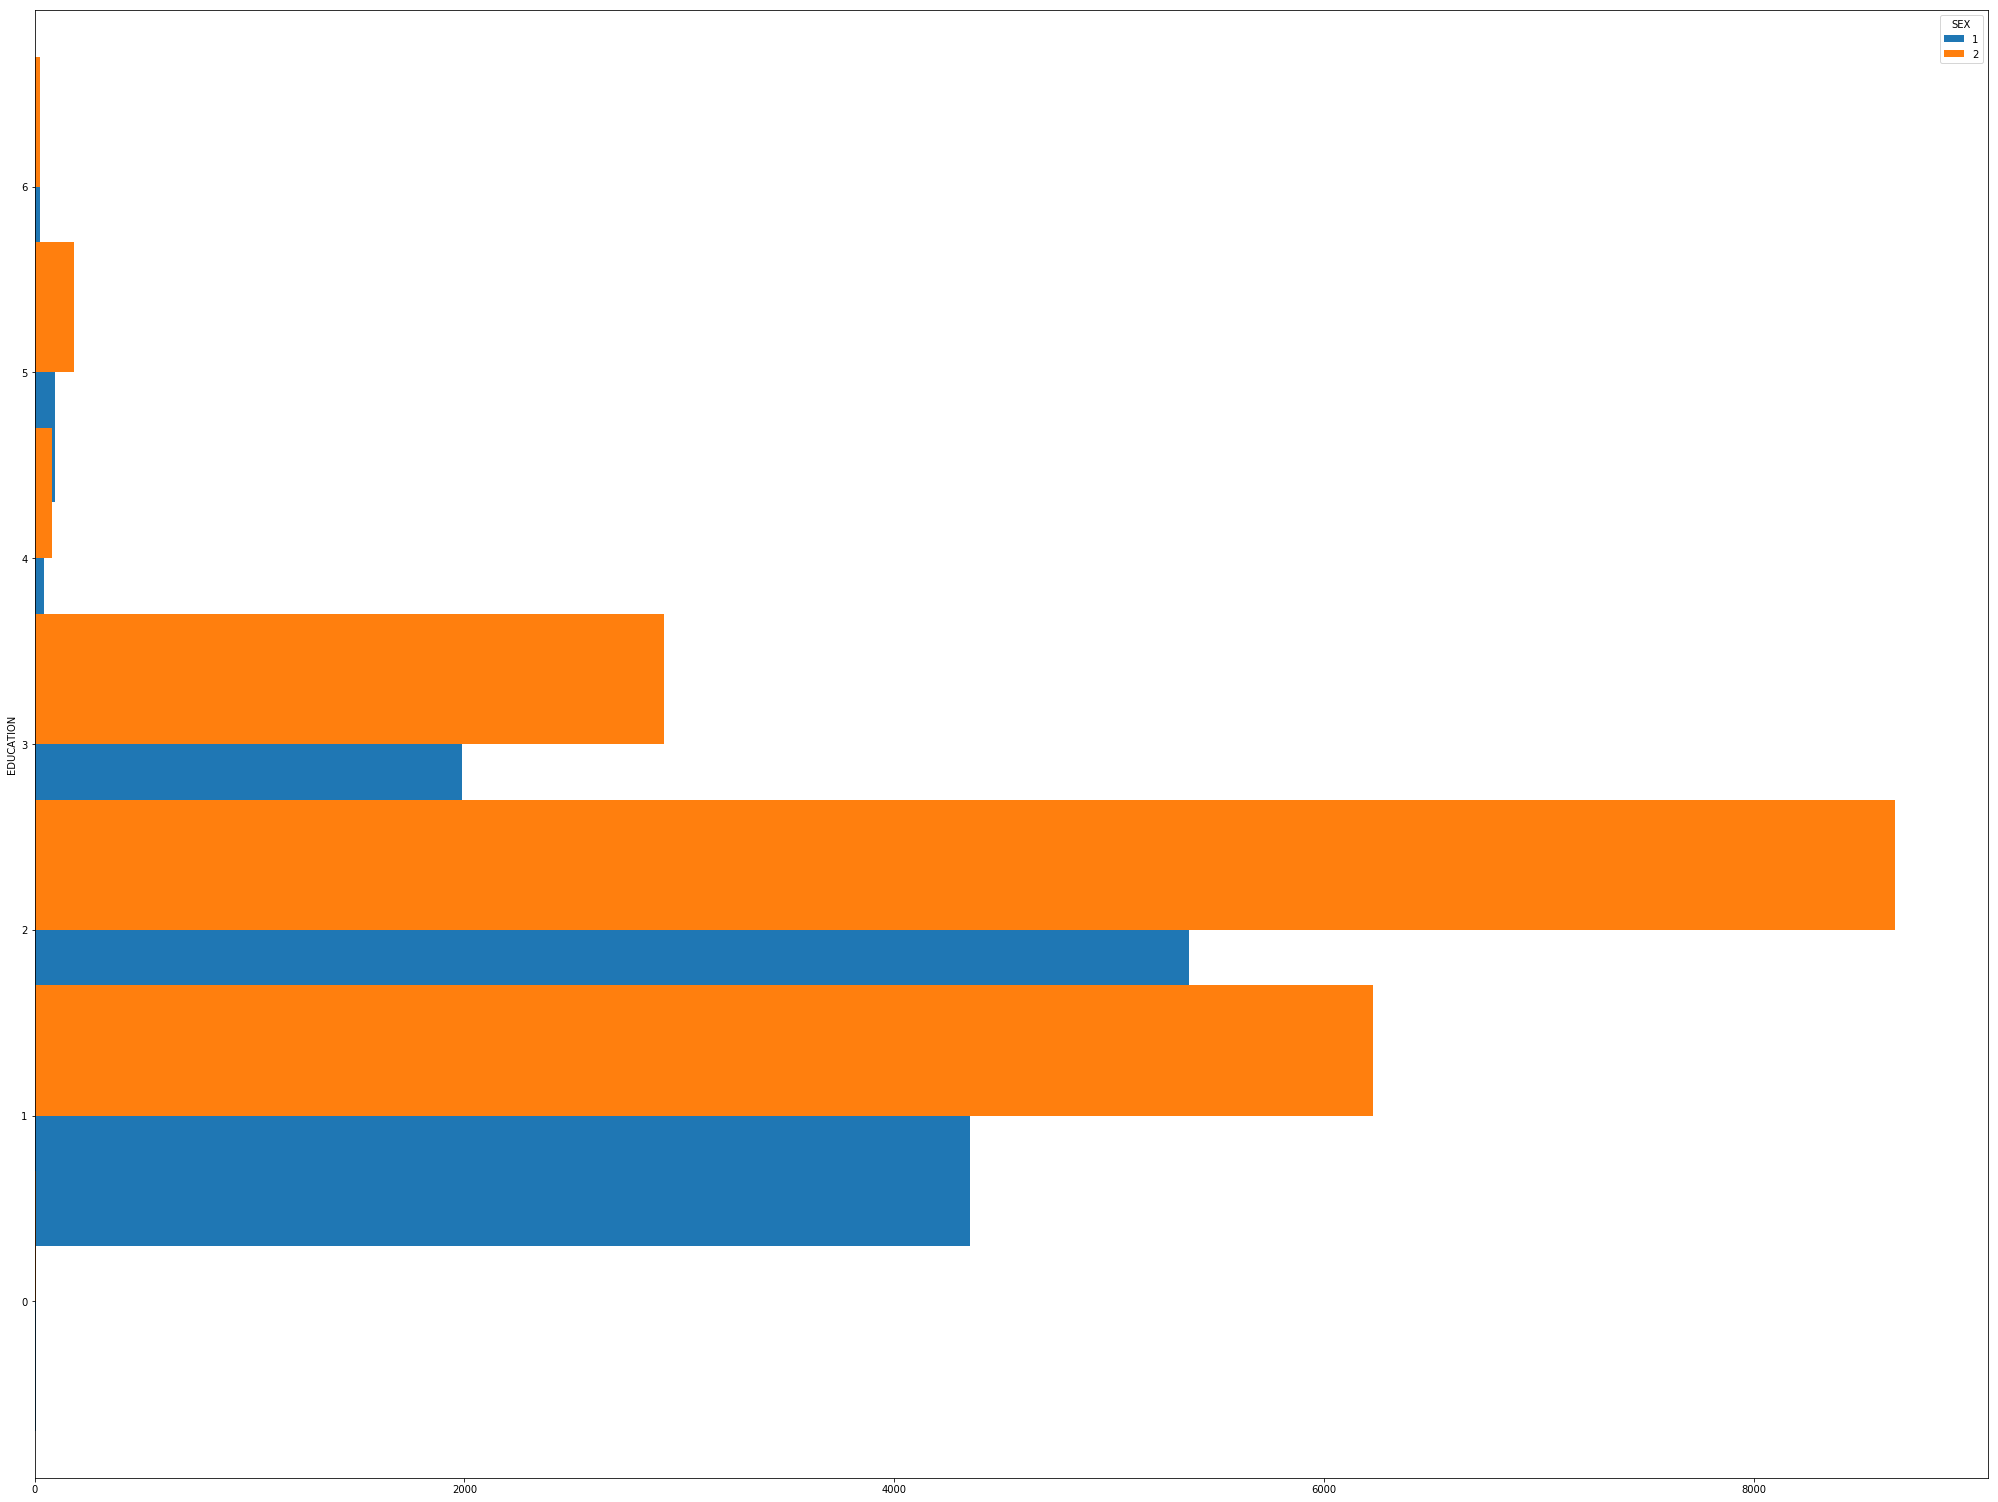

In [167]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
fig, ax = plot.subplots(figsize=(35,27))

df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'count').plot(kind='barh', width=1.4, ax=ax)
#TODO


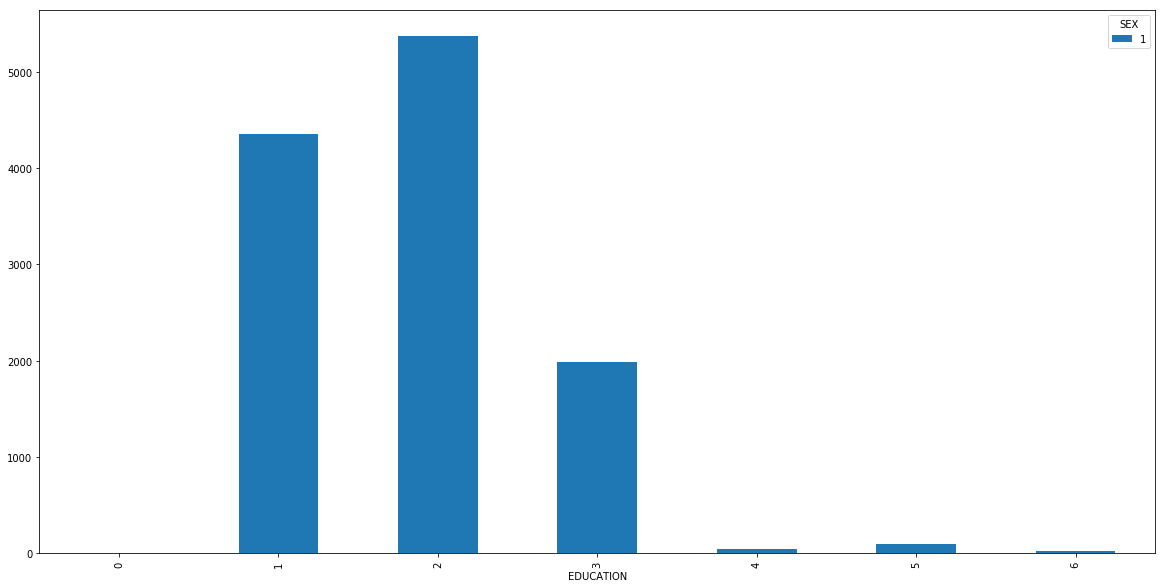

In [171]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
fig, ax = plot.subplots(figsize=(20,10))

df[df['SEX'] == 1].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'count').plot(kind='bar', width=0.5, ax=ax)
#TODO

In [189]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn 
 

# Load the example dataset for Anscombe's quartet
df = seaborn.load_dataset("df")

# Show the results of a linear regression within each dataset
#sns.lmplot(x="x", y="y", col="AGE", hue="SEX", data=df,
 #          col_wrap=2, ci=None, palette="muted", size=4,
  #         scatter_kws={"s": 50, "alpha": 1})

#TODO

HTTPError: HTTP Error 404: Not Found

In [ ]:
seaborn.pairplot(df, hue='SEX')